## Construção do diagrama P-V do CO$_2$ usando o plugin CoolProp

In [14]:
# Carregando os pacotes do Python
import numpy as np
import matplotlib.pyplot as plt

from CoolProp.CoolProp import PropsSI

In [15]:
# Selecionando o fluido e verificando as propriedades do ponto crítico
Fluido = "CarbonDioxide"

print(Fluido)

# Opções para construção do diagrama P-v
npontos = 1000
P_critico = PropsSI('PCRIT', Fluido) # Pa

print(P_critico)

Pmin = 2.5E6 # Pa
Pmax = P_critico - 100 # Pa
P_vec = np.linspace(Pmin,Pmax,num=npontos)
P_vec = np.append(P_vec, P_critico)

CarbonDioxide
7377300.0


In [16]:
# Retornando os valores da massa específica - estados líquido e gasoso 
# nesta faixa de pressao

d_sat_liq = PropsSI('D', 'P', P_vec, 'Q', 0, Fluido)
d_sat_vap = PropsSI('D', 'P', P_vec, 'Q', 1, Fluido)

v_sat_liq = 1/d_sat_liq
v_sat_vap = 1/d_sat_vap

vmin = np.min(v_sat_liq)
vmax = np.max(v_sat_vap)

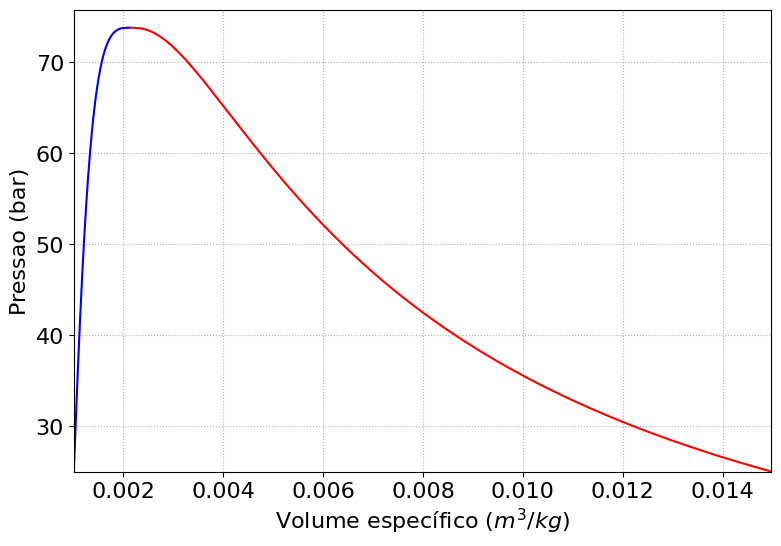

In [17]:
# Plotando agora o diagrama P-V
# Unidades: v em kg/m^3, pressáo em bar

plt.figure(figsize=(9,6))
plt.plot(v_sat_liq, P_vec/1E5, color='blue')
plt.plot(v_sat_vap, P_vec/1E5, color='red')
plt.grid(linestyle = ':')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Volume específico ($m^3/kg$)", fontsize = 16)
plt.ylabel("Pressao (bar)", fontsize = 16)
plt.axis([vmin, vmax, Pmin/1e5, P_critico/1e5+2])
plt.show()